In [59]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway

In [2]:
airbnb_data=pd.read_csv("Airbnb_Data.csv")

In [3]:
airbnb_data

id  log_price property_type        room_type  \
0       6901257   5.010635     Apartment  Entire home/apt   
1       6304928   5.129899     Apartment  Entire home/apt   
2       7919400   4.976734     Apartment  Entire home/apt   
3      13418779   6.620073         House  Entire home/apt   
4       3808709   4.744932     Apartment  Entire home/apt   
...         ...        ...           ...              ...   
74106  14549287   4.605170     Apartment     Private room   
74107  13281809   5.043425     Apartment  Entire home/apt   
74108  18688039   5.220356     Apartment  Entire home/apt   
74109  17045948   5.273000     Apartment  Entire home/apt   
74110   3534845   4.852030          Boat  Entire home/apt   

                                               amenities  accommodates  \
0      {"Wireless Internet","Air conditioning",Kitche...             3   
1      {"Wireless Internet","Air conditioning",Kitche...             7   
2      {TV,"Cable TV","Wireless Internet","Air condit...             5   
3      {TV,"Cable TV",Internet,"Wireless Internet",Ki...             4   
4      {TV,Internet,"Wireless Internet","Air conditio...             2   
...                                                  ...           ...   
74106                                                 {}             1   
74107  {TV,"Cable TV",Internet,"Wireless Internet",Ki...             4   
74108  {TV,Internet,"Wireless Internet","Air conditio...             5   
74109  {TV,"Wireless Internet","Air conditioning",Kit...             2   
74110  {TV,Internet,"Wireless Internet",Kitchen,"Free...             4   

       bathrooms  bed_type cancellation_policy  cleaning_fee  ...   latitude  \
0            1.0  Real Bed              strict          True  ...  40.696524   
1            1.0  Real Bed              strict          True  ...  40.766115   
2            1.0  Real Bed            moderate          True  ...  40.808110   
3            1.0  Real Bed            flexible          True  ...  37.772004   
4            1.0  Real Bed            moderate          True  ...  38.925627   
...          ...       ...                 ...           ...  ...        ...   
74106        1.0  Real Bed            flexible         False  ...  40.709025   
74107        2.0  Real Bed            moderate          True  ...  33.871549   
74108        1.0  Real Bed            moderate          True  ...  40.706749   
74109        1.0  Real Bed              strict          True  ...  40.738535   
74110        1.0  Real Bed            moderate         False  ...  33.761096   

        longitude                                        name  \
0      -73.991617              Beautiful brownstone 1-bedroom   
1      -73.989040    Superb 3BR Apt Located Near Times Square   
2      -73.943756                            The Garden Oasis   
3     -122.431619          Beautiful Flat in the Heart of SF!   
4      -77.034596                  Great studio in midtown DC   
...           ...                                         ...   
74106  -73.939405                           one room bushwick   
74107 -118.396053                Spacious Hermosa 2 BR on PCH   
74108  -73.942377  Modern 2 Bedroom Apartment in Williamsburg   
74109  -74.000157        Designer's Apartment in HEART of NYC   
74110 -118.192409              Cozy Boat at Shoreline Village   

          neighbourhood number_of_reviews review_scores_rating  \
0      Brooklyn Heights                 2                100.0   
1        Hell's Kitchen                 6                 93.0   
2                Harlem                10                 92.0   
3          Lower Haight                 0                  NaN   
4      Columbia Heights                 4                 40.0   
...                 ...               ...                  ...   
74106      Williamsburg                 0                  NaN   
74107     Hermosa Beach                16                 93.0   
74108      Williamsburg                43              

In [4]:
airbnb_data.head()

id  log_price property_type        room_type  \
0   6901257   5.010635     Apartment  Entire home/apt   
1   6304928   5.129899     Apartment  Entire home/apt   
2   7919400   4.976734     Apartment  Entire home/apt   
3  13418779   6.620073         House  Entire home/apt   
4   3808709   4.744932     Apartment  Entire home/apt   

                                           amenities  accommodates  bathrooms  \
0  {"Wireless Internet","Air conditioning",Kitche...             3        1.0   
1  {"Wireless Internet","Air conditioning",Kitche...             7        1.0   
2  {TV,"Cable TV","Wireless Internet","Air condit...             5        1.0   
3  {TV,"Cable TV",Internet,"Wireless Internet",Ki...             4        1.0   
4  {TV,Internet,"Wireless Internet","Air conditio...             2        1.0   

   bed_type cancellation_policy  cleaning_fee  ...   latitude   longitude  \
0  Real Bed              strict          True  ...  40.696524  -73.991617   
1  Real Bed              strict          True  ...  40.766115  -73.989040   
2  Real Bed            moderate          True  ...  40.808110  -73.943756   
3  Real Bed            flexible          True  ...  37.772004 -122.431619   
4  Real Bed            moderate          True  ...  38.925627  -77.034596   

                                       name     neighbourhood  \
0            Beautiful brownstone 1-bedroom  Brooklyn Heights   
1  Superb 3BR Apt Located Near Times Square    Hell's Kitchen   
2                          The Garden Oasis            Harlem   
3        Beautiful Flat in the Heart of SF!      Lower Haight   
4                Great studio in midtown DC  Columbia Heights   

  number_of_reviews review_scores_rating  \
0                 2                100.0   
1                 6                 93.0   
2                10                 92.0   
3                 0                  NaN   
4                 4                 40.0   

                                       thumbnail_url  zipcode bedrooms  beds  
0  https://a0.muscache.com/im/pictures/6d7cbbf7-c...    11201      1.0   1.0  
1  https://a0.muscache.com/im/pictures/348a55fe-4...    10019      3.0   3.0  
2  https://a0.muscache.com/im/pictures/6fae5362-9...    10027      1.0   3.0  
3  https://a0.muscache.com/im/pictures/72208dad-9...  94117.0      2.0   2.0  
4                                                NaN    20009      0.0   1.0  

[5 rows x 29 columns]

In [5]:
airbnb_data.tail()

id  log_price property_type        room_type  \
74106  14549287   4.605170     Apartment     Private room   
74107  13281809   5.043425     Apartment  Entire home/apt   
74108  18688039   5.220356     Apartment  Entire home/apt   
74109  17045948   5.273000     Apartment  Entire home/apt   
74110   3534845   4.852030          Boat  Entire home/apt   

                                               amenities  accommodates  \
74106                                                 {}             1   
74107  {TV,"Cable TV",Internet,"Wireless Internet",Ki...             4   
74108  {TV,Internet,"Wireless Internet","Air conditio...             5   
74109  {TV,"Wireless Internet","Air conditioning",Kit...             2   
74110  {TV,Internet,"Wireless Internet",Kitchen,"Free...             4   

       bathrooms  bed_type cancellation_policy  cleaning_fee  ...   latitude  \
74106        1.0  Real Bed            flexible         False  ...  40.709025   
74107        2.0  Real Bed            moderate          True  ...  33.871549   
74108        1.0  Real Bed            moderate          True  ...  40.706749   
74109        1.0  Real Bed              strict          True  ...  40.738535   
74110        1.0  Real Bed            moderate         False  ...  33.761096   

        longitude                                        name  neighbourhood  \
74106  -73.939405                           one room bushwick   Williamsburg   
74107 -118.396053                Spacious Hermosa 2 BR on PCH  Hermosa Beach   
74108  -73.942377  Modern 2 Bedroom Apartment in Williamsburg   Williamsburg   
74109  -74.000157        Designer's Apartment in HEART of NYC   West Village   
74110 -118.192409              Cozy Boat at Shoreline Village     Long Beach   

      number_of_reviews review_scores_rating  \
74106                 0                  NaN   
74107                16                 93.0   
74108                43                 94.0   
74109                 0                  NaN   
74110               205                 96.0   

                                           thumbnail_url  zipcode bedrooms  \
74106  https://a0.muscache.com/im/pictures/55162426/6...  11206.0      1.0   
74107  https://a0.muscache.com/im/pictures/2b86560b-a...    90254      2.0   
74108  https://a0.muscache.com/im/pictures/7fbe448c-5...  11206.0      2.0   
74109  https://a0.muscache.com/im/pictures/b3971b63-0...    10011      0.0   
74110  https://a0.muscache.com/im/pictures/22968537/d...    90802      1.0   

       beds  
74106   1.0  
74107   4.0  
74108   2.0  
74109   2.0  
74110   2.0  

[5 rows x 29 columns]

In [6]:
airbnb_data.sample(4)

id  log_price property_type        room_type  \
30015  17160220   5.857933     Apartment  Entire home/apt   
46682    154715   5.370638     Apartment  Entire home/apt   
27429  17301440   4.369448          Loft     Private room   
50642    373449   4.248495         House     Private room   

                                               amenities  accommodates  \
30015  {TV,Internet,"Wireless Internet","Air conditio...             8   
46682  {TV,"Cable TV",Internet,"Wireless Internet","A...             4   
27429  {TV,"Cable TV",Internet,"Wireless Internet","A...             8   
50642  {Internet,"Wireless Internet","Air conditionin...             2   

       bathrooms  bed_type cancellation_policy  cleaning_fee  ...   latitude  \
30015        1.0  Real Bed              strict          True  ...  40.642605   
46682        1.0  Real Bed              strict          True  ...  34.030370   
27429        1.0  Real Bed            moderate          True  ...  34.045087   
50642        1.0  Real Bed              strict          True  ...  40.759794   

        longitude                                            name  \
30015  -73.943341  4BR Brooklyn Apartment Minutes from City Life!   
46682 -118.381519               "Garden Oasis" 2BD in Culver City   
27429 -118.246877               Music Themed Artist Loft Downtown   
50642  -73.810165              Newly Reno Room with Private Bath^   

       neighbourhood number_of_reviews review_scores_rating  \
30015  East Flatbush                 1                100.0   
46682    Culver City                 2                100.0   
27429            NaN                 1                100.0   
50642       Flushing                 9                 91.0   

                                           thumbnail_url  zipcode bedrooms  \
30015  https://a0.muscache.com/im/pictures/fd7f00ff-4...  11203.0      4.0   
46682  https://a0.muscache.com/im/pictures/79806017/4...    90232      2.0   
27429  https://a0.muscache.com/im/pictures/0eb5f65b-9...    90013      1.0   
50642  https://a0.muscache.com/im/pictures/11594308/6...    11355      1.0   

       beds  
30015   4.0  
46682   2.0  
27429   1.0  
50642   1.0  

[4 rows x 29 columns]

In [7]:
airbnb_data.shape

(74111, 29)

In [8]:
columns=[]
for i in airbnb_data.columns:
    columns.append("  "+i+"  ")
print(columns)

['  id  ', '  log_price  ', '  property_type  ', '  room_type  ', '  amenities  ', '  accommodates  ', '  bathrooms  ', '  bed_type  ', '  cancellation_policy  ', '  cleaning_fee  ', '  city  ', '  description  ', '  first_review  ', '  host_has_profile_pic  ', '  host_identity_verified  ', '  host_response_rate  ', '  host_since  ', '  instant_bookable  ', '  last_review  ', '  latitude  ', '  longitude  ', '  name  ', '  neighbourhood  ', '  number_of_reviews  ', '  review_scores_rating  ', '  thumbnail_url  ', '  zipcode  ', '  bedrooms  ', '  beds  ']


In [9]:
airbnb_data.info

<bound method DataFrame.info of              id  log_price property_type        room_type  \
0       6901257   5.010635     Apartment  Entire home/apt   
1       6304928   5.129899     Apartment  Entire home/apt   
2       7919400   4.976734     Apartment  Entire home/apt   
3      13418779   6.620073         House  Entire home/apt   
4       3808709   4.744932     Apartment  Entire home/apt   
...         ...        ...           ...              ...   
74106  14549287   4.605170     Apartment     Private room   
74107  13281809   5.043425     Apartment  Entire home/apt   
74108  18688039   5.220356     Apartment  Entire home/apt   
74109  17045948   5.273000     Apartment  Entire home/apt   
74110   3534845   4.852030          Boat  Entire home/apt   

                                               amenities  accommodates  \
0      {"Wireless Internet","Air conditioning",Kitche...             3   
1      {"Wireless Internet","Air conditioning",Kitche...             7   
2      {TV,"C

In [10]:
airbnb_data.describe().T

count          mean           std         min  \
id                    74111.0  1.126662e+07  6.081735e+06  344.000000   
log_price             74111.0  4.782069e+00  7.173938e-01    0.000000   
accommodates          74111.0  3.155146e+00  2.153589e+00    1.000000   
bathrooms             73911.0  1.235263e+00  5.820441e-01    0.000000   
latitude              74111.0  3.844596e+01  3.080167e+00   33.338905   
longitude             74111.0 -9.239753e+01  2.170532e+01 -122.511500   
number_of_reviews     74111.0  2.090057e+01  3.782864e+01    0.000000   
review_scores_rating  57389.0  9.406736e+01  7.836556e+00   20.000000   
bedrooms              74020.0  1.265793e+00  8.521435e-01    0.000000   
beds                  73980.0  1.710868e+00  1.254142e+00    0.000000   

                               25%           50%           75%           max  
id                    6.261964e+06  1.225415e+07  1.640226e+07  2.123090e+07  
log_price             4.317488e+00  4.709530e+00  5.220356e+00  7.600402e+00  
accommodates          2.000000e+00  2.000000e+00  4.000000e+00  1.600000e+01  
bathrooms             1.000000e+00  1.000000e+00  1.000000e+00  8.000000e+00  
latitude              3.412791e+01  4.066214e+01  4.074610e+01  4.239044e+01  
longitude            -1.183424e+02 -7.699696e+01 -7.395466e+01 -7.098505e+01  
number_of_reviews     1.000000e+00  6.000000e+00  2.300000e+01  6.050000e+02  
review_scores_rating  9.200000e+01  9.600000e+01  1.000000e+02  1.000000e+02  
bedrooms              1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+01  
beds                  1.000000e+00  1.000000e+00  2.000000e+00  1.800000e+01

In [11]:
airbnb_data.describe(include="object").T

count unique  \
property_type           74111     35   
room_type               74111      3   
amenities               74111  67122   
bed_type                74111      5   
cancellation_policy     74111      5   
city                    74111      6   
description             74111  73479   
first_review            58247   2554   
host_has_profile_pic    73923      2   
host_identity_verified  73923      2   
host_response_rate      55812     80   
host_since              73923   3087   
instant_bookable        74111      2   
last_review             58284   1371   
name                    74111  73359   
neighbourhood           67239    619   
thumbnail_url           65895  65883   
zipcode                 73145    769   

                                                                      top  \
property_type                                                   Apartment   
room_type                                                 Entire home/apt   
amenities                                                              {}   
bed_type                                                         Real Bed   
cancellation_policy                                                strict   
city                                                                  NYC   
description             Hello, I've been running guest house for Korea...   
first_review                                                   2017-01-01   
host_has_profile_pic                                                    t   
host_identity_verified                                                  t   
host_response_rate                                                   100%   
host_since                                                     2015-03-30   
instant_bookable                                                        f   
last_review                                                    2017-04-30   
name                               Bunk bed in the Treat Street Clubhouse   
neighbourhood                                                Williamsburg   
thumbnail_url           https://a0.muscache.com/im/pictures/70087089/b...   
zipcode                                                           11211.0   

                         freq  
property_type           49003  
room_type               41310  
amenities                 586  
bed_type                72028  
cancellation_policy     32374  
city                    32349  
description                 8  
first_review              293  
host_has_profile_pic    73697  
host_identity_verified  49748  
host_response_rate      43254  
host_since                246  
instant_bookable        54660  
last_review              1344  
name                        8  
neighbourhood            2862  
thumbnail_url               3  
zipcode                  1368

In [12]:
airbnb_data.dtypes

id                          int64
log_price                 float64
property_type              object
room_type                  object
amenities                  object
accommodates                int64
bathrooms                 float64
bed_type                   object
cancellation_policy        object
cleaning_fee                 bool
city                       object
description                object
first_review               object
host_has_profile_pic       object
host_identity_verified     object
host_response_rate         object
host_since                 object
instant_bookable           object
last_review                object
latitude                  float64
longitude                 float64
name                       object
neighbourhood              object
number_of_reviews           int64
review_scores_rating      float64
thumbnail_url              object
zipcode                    object
bedrooms                  float64
beds                      float64
dtype: object

In [13]:
airbnb_data.isna().sum()

id                            0
log_price                     0
property_type                 0
room_type                     0
amenities                     0
accommodates                  0
bathrooms                   200
bed_type                      0
cancellation_policy           0
cleaning_fee                  0
city                          0
description                   0
first_review              15864
host_has_profile_pic        188
host_identity_verified      188
host_response_rate        18299
host_since                  188
instant_bookable              0
last_review               15827
latitude                      0
longitude                     0
name                          0
neighbourhood              6872
number_of_reviews             0
review_scores_rating      16722
thumbnail_url              8216
zipcode                     966
bedrooms                     91
beds                        131
dtype: int64

In [14]:
airbnb_data.duplicated().sum()

0

In [15]:
# Handling missing values
# Numerical columns
numerical_cols = ['bathrooms', 'review_scores_rating', 'bedrooms', 'beds']
for col in numerical_cols:
    airbnb_data[col].fillna(airbnb_data[col].median(), inplace=True)

# Categorical columns
categorical_cols = ['neighbourhood', 'host_has_profile_pic', 'host_identity_verified',
                    'host_response_rate', 'host_since', 'thumbnail_url', 'zipcode',
                    'first_review', 'last_review']
for col in categorical_cols:
    airbnb_data[col].fillna("Unknown", inplace=True)  # Imputing missing values with "Unknown"

# Exploratory Data Analysis (EDA)
# Summary statistics
print(airbnb_data.describe())

                 id     log_price  accommodates     bathrooms      latitude  \
count  7.411100e+04  74111.000000  74111.000000  74111.000000  74111.000000   
mean   1.126662e+07      4.782069      3.155146      1.234628     38.445958   
std    6.081735e+06      0.717394      2.153589      0.581386      3.080167   
min    3.440000e+02      0.000000      1.000000      0.000000     33.338905   
25%    6.261964e+06      4.317488      2.000000      1.000000     34.127908   
50%    1.225415e+07      4.709530      2.000000      1.000000     40.662138   
75%    1.640226e+07      5.220356      4.000000      1.000000     40.746096   
max    2.123090e+07      7.600402     16.000000      8.000000     42.390437   

          longitude  number_of_reviews  review_scores_rating      bedrooms  \
count  74111.000000       74111.000000          74111.000000  74111.000000   
mean     -92.397525          20.900568             94.503434      1.265467   
std       21.705322          37.828641              6.

In [17]:
skewness=airbnb_data.select_dtypes(include=["int","float"])
print("SKEWNESS")
print(skewness)

SKEWNESS
             id  log_price  accommodates  bathrooms   latitude   longitude  \
0       6901257   5.010635             3        1.0  40.696524  -73.991617   
1       6304928   5.129899             7        1.0  40.766115  -73.989040   
2       7919400   4.976734             5        1.0  40.808110  -73.943756   
3      13418779   6.620073             4        1.0  37.772004 -122.431619   
4       3808709   4.744932             2        1.0  38.925627  -77.034596   
...         ...        ...           ...        ...        ...         ...   
74106  14549287   4.605170             1        1.0  40.709025  -73.939405   
74107  13281809   5.043425             4        2.0  33.871549 -118.396053   
74108  18688039   5.220356             5        1.0  40.706749  -73.942377   
74109  17045948   5.273000             2        1.0  40.738535  -74.000157   
74110   3534845   4.852030             4        1.0  33.761096 -118.192409   

       number_of_reviews  review_scores_rating  bedroo

In [19]:
# Calculate skewness for numerical columns
skewness = airbnb_data.select_dtypes(include=['int', 'float']).apply(lambda x: x.skew())

# Convert skewness series to DataFrame
skewness_df = skewness.reset_index()
skewness_df.columns = ['Column', 'Skewness']

# Plot skewness
plt.figure(figsize=(10, 6))
sns.barplot(x='Column', y='Skewness', data=skewness_df, color='skyblue')
plt.title('Skewness of Numerical Columns')
plt.xlabel('Column')
plt.ylabel('Skewness')
plt.xticks(rotation=45)
plt.show()

In [20]:
Q1 = airbnb_data['log_price'].quantile(0.25)
Q3 = airbnb_data['log_price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = airbnb_data[(airbnb_data['log_price'] < lower_bound) | (airbnb_data['log_price'] > upper_bound)]
plt.figure(figsize=(6, 6))
sns.scatterplot(x=airbnb_data.index, y='log_price', data=airbnb_data, label='Data')
sns.scatterplot(x=outliers.index, y='log_price', data=outliers, color='red', label='Outliers')
plt.axhline(lower_bound, color='green', linestyle='--', label="Lower Fence")
plt.axhline(upper_bound, color='green', linestyle='--', label="Upper Fence")

print("IQR :",IQR)
print("LOWER_BOUND :",lower_bound)
print("UPPER_BOUND :",upper_bound)

plt.xlabel('Index')
plt.ylabel('Log Price')
plt.title('Scatter Plot of Log Price with Tukey\'s Fences and Outliers')
plt.legend()
plt.show()

IQR : 0.9028677115420143
LOWER_BOUND : 2.9631865462232887
UPPER_BOUND : 6.574657392391346


IQR : 0.9028677115420143
LOWER_BOUND : 2.9631865462232887
UPPER_BOUND : 6.574657392391346


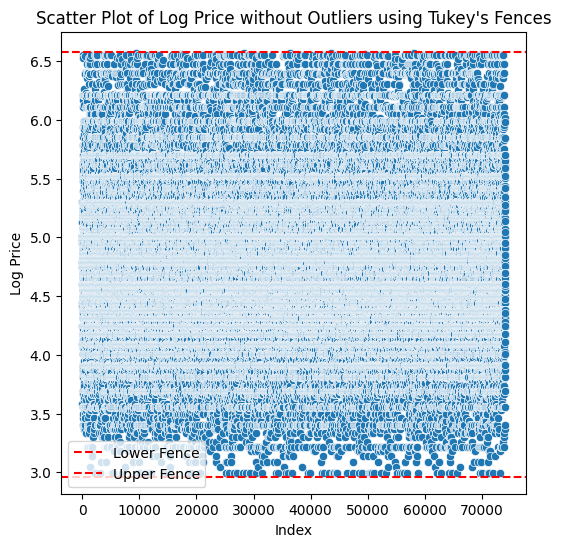

In [21]:
Q1 = airbnb_data['log_price'].quantile(0.25)
Q3 = airbnb_data['log_price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
filtered_df = airbnb_data[(airbnb_data['log_price'] >= lower_bound) & (airbnb_data['log_price'] <= upper_bound)]
plt.figure(figsize=(6, 6))
sns.scatterplot(x=filtered_df.index, y='log_price', data=filtered_df)
plt.axhline(lower_bound, color='red', linestyle='--', label="Lower Fence")
plt.axhline(upper_bound, color='red', linestyle='--', label="Upper Fence")

print("IQR :",IQR)
print("LOWER_BOUND :",lower_bound)
print("UPPER_BOUND :",upper_bound)

plt.xlabel('Index')
plt.ylabel('Log Price')
plt.title('Scatter Plot of Log Price without Outliers using Tukey\'s Fences')
plt.legend()
plt.show()

In [44]:
filtered_airbnb_data=filtered_df[["id","property_type","room_type","amenities","accommodates","bedrooms","beds","bathrooms","bed_type",
                                  "review_scores_rating","cancellation_policy",
                 "cleaning_fee","city","description","latitude","longitude","neighbourhood","log_price"]]

In [45]:
filtered_airbnb_data

id property_type        room_type  \
0       6901257     Apartment  Entire home/apt   
1       6304928     Apartment  Entire home/apt   
2       7919400     Apartment  Entire home/apt   
4       3808709     Apartment  Entire home/apt   
5      12422935     Apartment     Private room   
...         ...           ...              ...   
74106  14549287     Apartment     Private room   
74107  13281809     Apartment  Entire home/apt   
74108  18688039     Apartment  Entire home/apt   
74109  17045948     Apartment  Entire home/apt   
74110   3534845          Boat  Entire home/apt   

                                               amenities  accommodates  \
0      {"Wireless Internet","Air conditioning",Kitche...             3   
1      {"Wireless Internet","Air conditioning",Kitche...             7   
2      {TV,"Cable TV","Wireless Internet","Air condit...             5   
4      {TV,Internet,"Wireless Internet","Air conditio...             2   
5      {TV,"Wireless Internet",Heating,"Smoke detecto...             2   
...                                                  ...           ...   
74106                                                 {}             1   
74107  {TV,"Cable TV",Internet,"Wireless Internet",Ki...             4   
74108  {TV,Internet,"Wireless Internet","Air conditio...             5   
74109  {TV,"Wireless Internet","Air conditioning",Kit...             2   
74110  {TV,Internet,"Wireless Internet",Kitchen,"Free...             4   

       bedrooms  beds  bathrooms  bed_type  review_scores_rating  \
0           1.0   1.0        1.0  Real Bed                 100.0   
1           3.0   3.0        1.0  Real Bed                  93.0   
2           1.0   3.0        1.0  Real Bed                  92.0   
4           0.0   1.0        1.0  Real Bed                  40.0   
5           1.0   1.0        1.0  Real Bed                 100.0   
...         ...   ...        ...       ...                   ...   
74106       1.0   1.0        1.0  Real Bed                  96.0   
74107       2.0   4.0        2.0  Real Bed                  93.0   
74108       2.0   2.0        1.0  Real Bed                  94.0   
74109       0.0   2.0        1.0  Real Bed                  96.0   
74110       1.0   2.0        1.0  Real Bed                  96.0   

      cancellation_policy  cleaning_fee city  \
0                  strict          True  NYC   
1                  strict          True  NYC   
2                moderate          True  NYC   
4                moderate          True   DC   
5                  strict          True   SF   
...                   ...           ...  ...   
74106            flexible         False  NYC   
74107            moderate          True   LA   
74108            moderate          True  NYC   
74109              strict          True  NYC   
74110            moderate         False   LA   

                                             description   latitude  \
0      Beautiful, sunlit brownstone 1-bedroom in the ...  40.696524   
1      Enjoy travelling during your stay in Manhattan...  40.766115   
2      The Oasis comes complete with a full backyard ...  40.808110   
4      Cool, cozy, and comfortable studio located in ...  38.925627   
5      Beautiful private room overlooking scenic view...  37.753164   
...                                                  ...        ...   
74106                          one room in bushwick apt   40.709025   
74107  Located on the Pacific Coast Highway, this apa...  33.871549   
74108  A modern apartment located in East Williamsbur...  40.706749   
74109  Fully renovated, designer's studio located in ...  40.738535   
74110  You will stay-aboard the Island Trader at one ...  33.761096   

        longitude     neighbourhood  log_price  
0      -73.991617  Brooklyn Heights   5.010635  
1      -73.989040    Hell's Kitchen   5.129899  
2      -73.943756            Harlem   4.976734  
4      -77.034596  Columbia Heights   4.744932  
5     -122.429526        Noe Va

In [46]:
filtered_airbnb_data["property_type"].value_counts()

property_type
Apartment             48478
House                 15803
Condominium            2578
Townhouse              1636
Loft                   1207
Other                   571
Guesthouse              495
Bed & Breakfast         460
Bungalow                365
Villa                   142
Dorm                    132
Guest suite             123
Camper/RV                93
Timeshare                76
Cabin                    72
In-law                   71
Boutique hotel           65
Boat                     60
Hostel                   49
Serviced apartment       20
Tent                     18
Castle                   12
Vacation home            11
Yurt                      9
Hut                       7
Treehouse                 6
Chalet                    6
Tipi                      3
Earth House               3
Train                     2
Cave                      2
Casa particular           1
Parking Space             1
Lighthouse                1
Island                    1
Name: 

In [47]:
desired_property_type=["Apartment","House","Condominium","Townhouse","Loft","Other","Guesthouse","Bed & Breakfast","Bungalow","villa"]
segmented_airbnb_data=filtered_airbnb_data[filtered_airbnb_data["property_type"].isin(desired_property_type)]
segmented_airbnb_data

id property_type        room_type  \
0       6901257     Apartment  Entire home/apt   
1       6304928     Apartment  Entire home/apt   
2       7919400     Apartment  Entire home/apt   
4       3808709     Apartment  Entire home/apt   
5      12422935     Apartment     Private room   
...         ...           ...              ...   
74105    808802         House     Private room   
74106  14549287     Apartment     Private room   
74107  13281809     Apartment  Entire home/apt   
74108  18688039     Apartment  Entire home/apt   
74109  17045948     Apartment  Entire home/apt   

                                               amenities  accommodates  \
0      {"Wireless Internet","Air conditioning",Kitche...             3   
1      {"Wireless Internet","Air conditioning",Kitche...             7   
2      {TV,"Cable TV","Wireless Internet","Air condit...             5   
4      {TV,Internet,"Wireless Internet","Air conditio...             2   
5      {TV,"Wireless Internet",Heating,"Smoke detecto...             2   
...                                                  ...           ...   
74105  {TV,Internet,"Wireless Internet","Air conditio...             2   
74106                                                 {}             1   
74107  {TV,"Cable TV",Internet,"Wireless Internet",Ki...             4   
74108  {TV,Internet,"Wireless Internet","Air conditio...             5   
74109  {TV,"Wireless Internet","Air conditioning",Kit...             2   

       bedrooms  beds  bathrooms  bed_type  review_scores_rating  \
0           1.0   1.0        1.0  Real Bed                 100.0   
1           3.0   3.0        1.0  Real Bed                  93.0   
2           1.0   3.0        1.0  Real Bed                  92.0   
4           0.0   1.0        1.0  Real Bed                  40.0   
5           1.0   1.0        1.0  Real Bed                 100.0   
...         ...   ...        ...       ...                   ...   
74105       1.0   1.0        1.0  Real Bed                  91.0   
74106       1.0   1.0        1.0  Real Bed                  96.0   
74107       2.0   4.0        2.0  Real Bed                  93.0   
74108       2.0   2.0        1.0  Real Bed                  94.0   
74109       0.0   2.0        1.0  Real Bed                  96.0   

      cancellation_policy  cleaning_fee city  \
0                  strict          True  NYC   
1                  strict          True  NYC   
2                moderate          True  NYC   
4                moderate          True   DC   
5                  strict          True   SF   
...                   ...           ...  ...   
74105            moderate          True   LA   
74106            flexible         False  NYC   
74107            moderate          True   LA   
74108            moderate          True  NYC   
74109              strict          True  NYC   

                                             description   latitude  \
0      Beautiful, sunlit brownstone 1-bedroom in the ...  40.696524   
1      Enjoy travelling during your stay in Manhattan...  40.766115   
2      The Oasis comes complete with a full backyard ...  40.808110   
4      Cool, cozy, and comfortable studio located in ...  38.925627   
5      Beautiful private room overlooking scenic view...  37.753164   
...                                                  ...        ...   
74105  Perfect for 1 person, will accept couples at a...  34.092640   
74106                          one room in bushwick apt   40.709025   
74107  Located on the Pacific Coast Highway, this apa...  33.871549   
74108  A modern apartment located in East Williamsbur...  40.706749   
74109  Fully renovated, designer's studio located in ...  40.738535   

        longitude     neighbourhood  log_price  
0      -73.991617  Brooklyn Heights   5.010635  
1      -73.989040    Hell's Kitchen   5.129899  
2      -73.943756            Harlem   4.976734  
4      -77.034596  Columbia Heights   4.744932  
5     -122.429526        Noe Va

property_type
Apartment          48478
House              15803
Condominium         2578
Townhouse           1636
Loft                1207
Other                571
Guesthouse           495
Bed & Breakfast      460
Bungalow             365
Name: count, dtype: int64


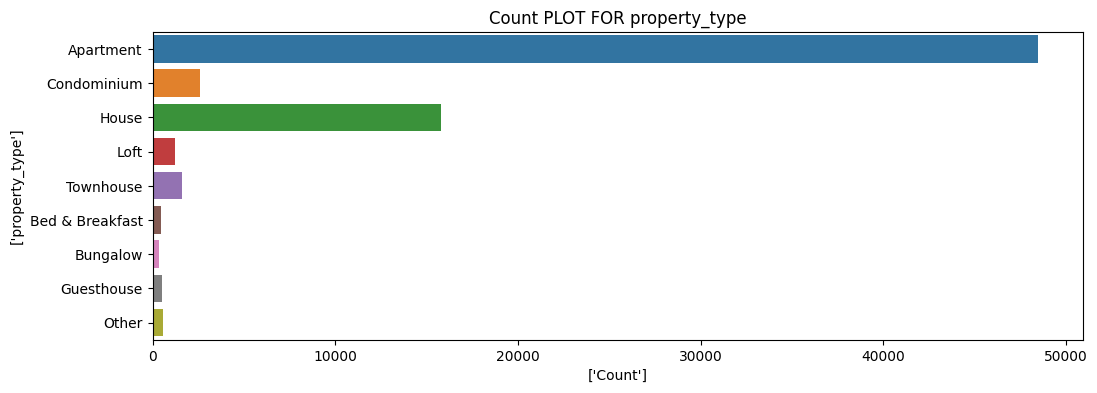

In [48]:
Count=segmented_airbnb_data["property_type"].value_counts()
plt.figure(figsize=(12,4))
sns.countplot(segmented_airbnb_data,y="property_type")
plt.title("Count PLOT FOR property_type")
plt.xlabel(["Count"])
plt.ylabel(["property_type"])
print(Count)
plt.show()

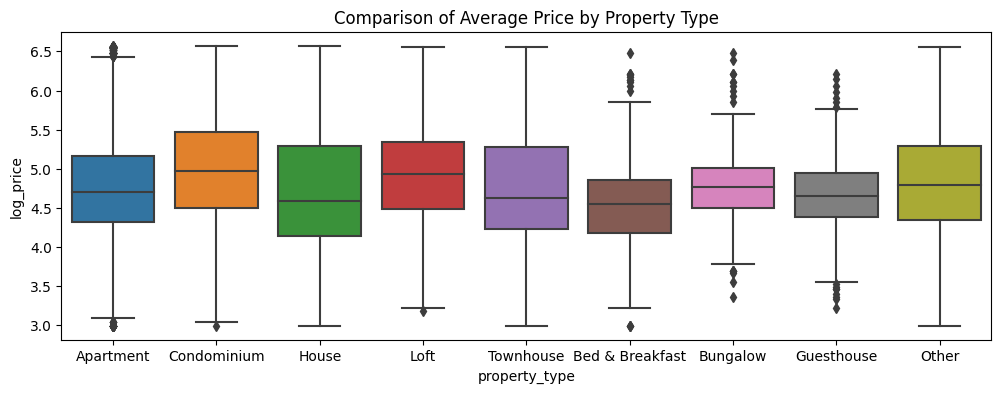

In [49]:
plt.figure(figsize=(12,4))
sns.boxplot(x="property_type",y="log_price",data=segmented_airbnb_data)
plt.xlabel("property_type")
plt.ylabel("log_price")
plt.title("Comparison of Average Price by Property Type")
plt.show()

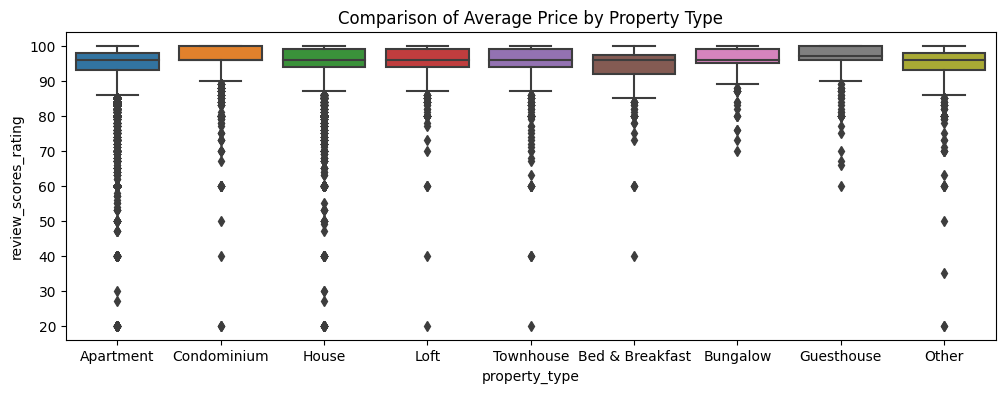

In [52]:
plt.figure(figsize=(12,4))
sns.boxplot(x="property_type",y="review_scores_rating",data=segmented_airbnb_data)
plt.xlabel("property_type")
plt.ylabel("review_scores_rating")
plt.title("Comparison of Average Price by Property Type")
plt.show()

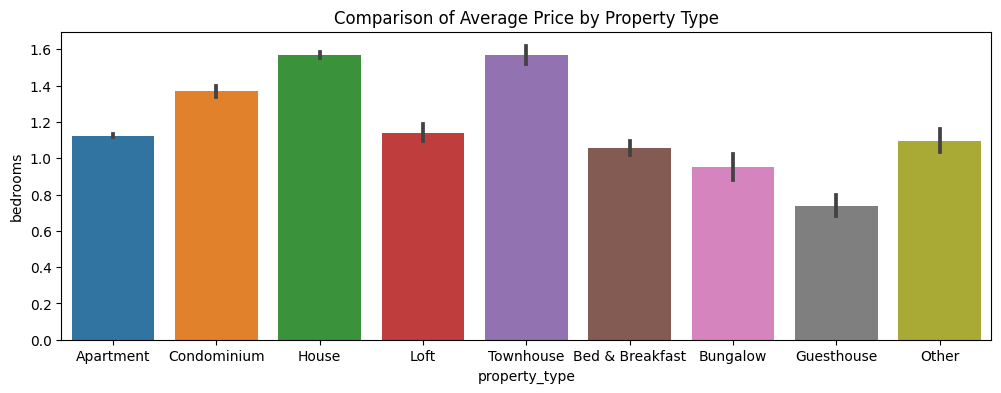

In [54]:
plt.figure(figsize=(12,4))
sns.barplot(x="property_type",y="bedrooms",data=segmented_airbnb_data)
plt.xlabel("property_type")
plt.ylabel("bedrooms")
plt.title("Comparison of Average Price by Property Type")
plt.show()

### ANOVA-TEST

**The output you provided is the result of an ANOVA (Analysis of Variance) test conducted to compare the average price among different property types (Apartment, House, Condo). Here's what each part of the output means:**

**F-statistic:
The F-statistic is a measure of the ratio of variances between groups and within groups.
In the context of ANOVA, it indicates whether there are significant differences in the
means of the groups being compared.
A larger F-statistic suggests a greater difference between the group means.**

**p-value:**

**The p-value is the probability of observing the data, or more extreme data, under the assumption that the null hypothesis is true.
In this case, the null hypothesis (H0) is that there are no significant differences in the average price among the property types.
A low p-value indicates strong evidence against the null hypothesis, suggesting that the observed differences are unlikely to be due to random chance.
The p-value is typically compared to a significance level (e.g., α = 0.05) to determine statistical significance. If the p-value is less than the significance level, the null hypothesis is rejected.**

In [69]:
anova_results=f_oneway(segmented_airbnb_data[segmented_airbnb_data["property_type"]=="Apartment"]["log_price"],
                       segmented_airbnb_data[segmented_airbnb_data["property_type"]=="House"]["log_price"],
                       segmented_airbnb_data[segmented_airbnb_data["property_type"]=="Condominium"]["log_price"],
                       segmented_airbnb_data[segmented_airbnb_data["property_type"]=="Townhouse"]["log_price"],
                       segmented_airbnb_data[segmented_airbnb_data["property_type"]=="Loft"]["log_price"],
                       segmented_airbnb_data[segmented_airbnb_data["property_type"]=="Other"]["log_price"],
                       segmented_airbnb_data[segmented_airbnb_data["property_type"]=="Guesthouse"]["log_price"],
                       segmented_airbnb_data[segmented_airbnb_data["property_type"]=="Bed & Breakfast"]["log_price"],
                       segmented_airbnb_data[segmented_airbnb_data["property_type"]=="Bungalow"]["log_price"])
print("ANOVA results for average price comparison")
print("F-statistic :",anova_results.statistic)
print("p-value :",anova_results.pvalue)

ANOVA results for average price comparison
F-statistic : 69.10091128699877
p-value : 9.158158511728371e-114


In your output:

**The F-statistic is approximately 69.10, indicating that there is a substantial difference in the average price among the property types.
The p-value is extremely small (9.16e-114), much smaller than the typical significance level of 0.05. This suggests strong evidence against the null hypothesis, indicating that the observed differences in average price among property types are statistically significant. Therefore, we reject the null hypothesis and conclude that there are significant differences in the average price among the property types.**


In [70]:
segmented_airbnb_data.columns

Index(['id', 'property_type', 'room_type', 'amenities', 'accommodates',
       'bedrooms', 'beds', 'bathrooms', 'bed_type', 'review_scores_rating',
       'cancellation_policy', 'cleaning_fee', 'city', 'description',
       'latitude', 'longitude', 'neighbourhood', 'log_price'],
      dtype='object')

### Kruskal-Wallis

***The output you provided is the result of a Kruskal-Wallis test conducted to compare the review scores among different property types (Apartment, House, Condo). Here's what each part of the output means:***

***H-statistic:***

***The H-statistic is a measure of the Kruskal-Wallis test, which assesses whether the distributions of scores in different groups are the same.
It is a non-parametric alternative to ANOVA and is used when the assumptions of ANOVA, such as normality and homogeneity of variances, are not met.
Higher values of the H-statistic suggest greater differences in the distributions of scores among the groups.***

***p-value:***

***The p-value is the probability of observing the data, or more extreme data, under the assumption that the null hypothesis is true.
In this case, the null hypothesis (H0) is that there are no significant differences in the review scores among the property types.
A low p-value indicates strong evidence against the null hypothesis, suggesting that the observed differences are unlikely to be due to random chance.
The p-value is typically compared to a significance level (e.g., α = 0.05) to determine statistical significance. If the p-value is less than the significance level, the null hypothesis is rejected.***

In [73]:
from scipy.stats import kruskal
kruskal_results = kruskal(segmented_airbnb_data[segmented_airbnb_data["property_type"]=="Apartment"]["review_scores_rating"],
                       segmented_airbnb_data[segmented_airbnb_data["property_type"]=="House"]["review_scores_rating"],
                       segmented_airbnb_data[segmented_airbnb_data["property_type"]=="Condominium"]["review_scores_rating"],
                       segmented_airbnb_data[segmented_airbnb_data["property_type"]=="Townhouse"]["review_scores_rating"],
                       segmented_airbnb_data[segmented_airbnb_data["property_type"]=="Loft"]["review_scores_rating"],
                       segmented_airbnb_data[segmented_airbnb_data["property_type"]=="Other"]["review_scores_rating"],
                       segmented_airbnb_data[segmented_airbnb_data["property_type"]=="Guesthouse"]["review_scores_rating"],
                       segmented_airbnb_data[segmented_airbnb_data["property_type"]=="Bed & Breakfast"]["review_scores_rating"],
                       segmented_airbnb_data[segmented_airbnb_data["property_type"]=="Bungalow"]["review_scores_rating"])

print("Kruskal-Wallis results for review scores comparison:")
print("H-statistic:", kruskal_results.statistic)
print("p-value:", kruskal_results.pvalue)

Kruskal-Wallis results for review scores comparison:
H-statistic: 450.0086061762391
p-value: 3.682113917274494e-92


In your output:

**The H-statistic is approximately 450.01, indicating that there is a substantial difference in the distributions of review scores among the property types.**
***The p-value is extremely small (3.68e-92), much smaller than the typical significance level of 0.05. This suggests strong evidence against the null hypothesis, indicating that the observed differences in review scores among property types are statistically significant. Therefore, we reject the null hypothesis and conclude that there are significant differences in the distributions of review scores among the property types.***





